# Overfitting vs Underfitting

## Bias vs Variance 
- Bias: 
    - it's the model's tendency to make errors due to simplified assumptions
    - High bias means the model is too simplistic and cannot capture the true patterns and nuances in the data 
    - e.g. trying to fit a straight line into a curved relationship. Linear regression applied to non-linear problem is form of bias 44
    - high bias = underfitting
- Variance: 
    - Model's sensitivity to small fluctuations or nuances in the training data (overcomplicating assumptions)
    - High variance means the model is overly complex and fits the training data too closely 
    - e.g. a decision tree model with too many branches
    - high variance = overfitting

### addressing overfitting and underfitting
- for overfitting:simplify the model 
    - use fewer features
    - reduce complexity of model parameters 
    - apply regularization
- for underfitting: increase the complexity of the model 
    - add more features 
    - increase the amount of training data where you have more diverse instances

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #will always use
from sklearn.metrics import accuracy_score #math measures 
from sklearn.tree import DecisionTreeClassifier #decision tree classifier

C:\Users\chand\AppData\Local\Temp\ipykernel_15820\4003468610.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [34]:
#Generate our own data: Create x and y variables using make class
x,y = make_classification(n_samples=90000, #data points
                          n_features=18,  #total number of features for prediction
                          n_informative=4, #features that will be used for ML model
                          n_redundant=12, #num of features that will cause noise
                          random_state=20) #ensure we have the same randomness as prof

#note: x * y are both horizontal arrrays, so later need to convert to vertical array

In [35]:
#view some values in x
x[:20]

array([[-1.56261457e+00,  4.92120705e-01, -2.22608662e+00,
         9.05290418e-01, -1.85323615e+00, -2.37003567e+00,
         9.10637788e-01, -2.31415748e+00, -1.14689864e+00,
        -3.24769553e-01, -7.57911250e-01,  8.44508879e-01,
        -2.81016773e+00,  2.18146107e+00,  1.27041639e+00,
         2.86723107e+00, -2.40825002e-01, -1.58837073e-01],
       [-6.02709718e-01,  6.95167350e-01, -3.96033697e-01,
         1.03859442e+00, -4.82862888e-01, -3.70608386e-01,
         9.57220705e-01, -2.53504325e-01, -1.83792320e+00,
        -1.42296346e+00, -1.50068161e-01, -1.96659661e+00,
        -2.86842218e+00,  1.00075321e+00,  1.67091459e-01,
        -1.66415068e+00, -1.67129958e+00,  2.26297750e-01],
       [ 3.60542441e-01, -2.00718015e+00, -1.80460842e+00,
        -3.95251958e+00,  1.94057392e+00, -3.46350697e-02,
        -4.62993251e-01,  8.60537769e-01,  1.10855525e+00,
        -1.73517103e-01, -2.30614747e-01,  5.82194317e-01,
         2.14836633e+00,  2.89353175e-01,  1.35555825e

In [36]:
#optional step - for data display only. show data in tabular format 
pd.DataFrame(np.hstack((x,y.reshape(-1,1)))) #join x & y, concevert y into a vertical column. 

#hstack() takes 1 positional argument but 2 were given, therefore need to use additional ()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.562615,0.492121,-2.226087,0.905290,-1.853236,-2.370036,0.910638,-2.314157,-1.146899,-0.324770,-0.757911,0.844509,-2.810168,2.181461,1.270416,2.867231,-0.240825,-0.158837,1.0
1,-0.602710,0.695167,-0.396034,1.038594,-0.482863,-0.370608,0.957221,-0.253504,-1.837923,-1.422963,-0.150068,-1.966597,-2.868422,1.000753,0.167091,-1.664151,-1.671300,0.226298,1.0
2,0.360542,-2.007180,-1.804608,-3.952520,1.940574,-0.034635,-0.462993,0.860538,1.108555,-0.173517,-0.230615,0.582194,2.148366,0.289353,1.355558,1.453900,2.005496,-1.361107,1.0
3,0.884689,-1.090710,-2.452385,-1.617876,0.794564,-0.124157,0.748428,-0.454601,-0.322665,-1.689337,-0.843936,-1.637148,-1.175070,0.915963,0.610611,0.081239,0.872573,-1.572418,0.0
4,-2.160318,-0.758003,-0.452420,-2.905384,1.073982,-1.069572,-0.459348,1.372699,-0.429526,0.322822,0.562948,0.013995,0.976002,1.095518,2.125494,0.914757,-0.265504,-1.089029,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,-3.318444,1.082497,0.058738,0.875586,-1.884494,-2.563311,-0.116314,-0.985005,-0.930459,1.467499,0.386512,0.130615,-0.926277,1.655216,1.639090,3.001642,-1.149247,0.653913,1.0
89996,2.367166,-3.424923,-1.907934,-6.388648,4.462504,1.991775,-0.607989,2.783918,1.665515,-1.487891,-0.208935,0.398946,3.561934,-0.781182,0.887666,-1.349608,2.776428,2.291672,0.0
89997,0.502493,-1.826681,-1.257041,-3.502129,1.748478,0.145266,-0.686963,0.833216,1.470514,0.304761,-0.114161,0.374634,2.664625,-0.128541,1.004040,1.588247,2.109721,0.352450,0.0
89998,-2.115502,0.387850,-2.786245,0.634209,-2.226750,-3.125800,0.822445,-2.843641,-0.944407,0.130174,-0.874162,0.323612,-2.648082,2.641132,1.816834,4.448761,0.179127,0.757544,1.0


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=20)

### Decision Tree Objective 
- increase the complexity of the tree branches gradually and observe the accuracy 
- increase the complexity -> moving closer to overfitting or capture the nuances and noise in the data 
- increasing the complexity for decision trees can be one in multiple ways, we'll be using **max depth** which adjusts the number of layers in the decision tree 

To achieve this simulation exercise: 
- define the range of `max_depth` e.g. 1 to 10 
- deploy the model with `max_depth=1`
- Fit the model and create train_yhat (predicted values from algo based on training data)
- get the accuracy score for train 
- do the same steps for test 
- print an dplot the output

In [38]:
#Create 2 empty lists: 1 for test and for train scores 
train_scores, test_scores = list(),list()

In [39]:
#Define the range of my values for 'max_depth'
values = list(range(1,21))
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [40]:
#go through all these maxdepth values. build a loop!
for i in values: 
    #define the model 
    model = DecisionTreeClassifier(max_depth=i)

    #train or fit the model 
    model.fit(x_train,y_train)

    #get the predicted values for training dataset 
    y_hat_train = model.predict(x_train)
    #get the accuracy
    train_accu = accuracy_score(y_train,y_hat_train)

    #do the same for test dataset 
    y_hat_test = model.predict(x_test)
    test_accu = accuracy_score(y_test,y_hat_test) #actual vs predicted values

    #capture the accuracy results and append them into our blank lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #print report of results 
    print(f'Iteration with max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')






Iteration with max_depth=1 	| train score:0.699 	| test score:0.699
Iteration with max_depth=2 	| train score:0.832 	| test score:0.833
Iteration with max_depth=3 	| train score:0.865 	| test score:0.864
Iteration with max_depth=4 	| train score:0.899 	| test score:0.898
Iteration with max_depth=5 	| train score:0.930 	| test score:0.927
Iteration with max_depth=6 	| train score:0.937 	| test score:0.935
Iteration with max_depth=7 	| train score:0.952 	| test score:0.945
Iteration with max_depth=8 	| train score:0.961 	| test score:0.956
Iteration with max_depth=9 	| train score:0.967 	| test score:0.960
Iteration with max_depth=10 	| train score:0.973 	| test score:0.963
Iteration with max_depth=11 	| train score:0.977 	| test score:0.965
Iteration with max_depth=12 	| train score:0.981 	| test score:0.967
Iteration with max_depth=13 	| train score:0.983 	| test score:0.966
Iteration with max_depth=14 	| train score:0.986 	| test score:0.966
Iteration with max_depth=15 	| train score:

Text(0, 0.5, 'Accuracy')

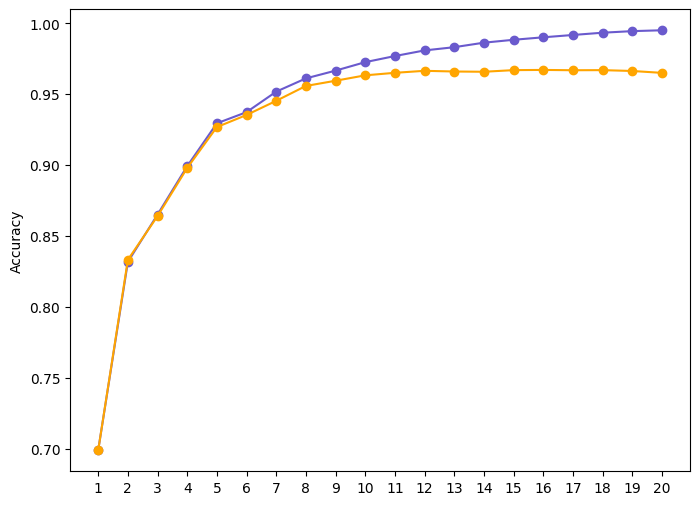

In [43]:
#plot the results
plt.figure(figsize=(8,6))
plt.plot(values,train_scores,'-o',label="train data",color='slateblue')
plt.plot(values,test_scores,'-o',label="test data",color='orange')
plt.xticks(values)
plt.ylabel('Accuracy')
